In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
print("\nDateTime: String, defines date and time of sample")
print("\nHoliday: String, gives name of holiday if day is a bank holiday")
print("\nHolidayFlag: integer, 1 if day is a bank holiday, zero otherwise")
print("\nDayOfWeek: integer (0–6), 0 monday, day of week")
print("\nWeekOfYear: integer, running week within year of this date")
print("\nDay integer: day of the date")
print("\nMonth integer: month of the date")
print("\nYear integer: year of the date")
print("\nPeriodOfDay integer: denotes half hour period of day (0–47)")
print("\nSystemLoadEA: the national load forecast for this period")
print("\nSMPEA: the price forecast for this period")
print("\nORKTemperature: the actual temperature measured at Cork airport")
print("\nORKWindspeed: the actual windspeed measured at Cork airport")
print("\nCO2Intensity: the actual CO2 intensity in (g/kWh) for the electricity produced")
print("\nActualWindProduction: the actual wind energy production for this period")
print("\nSystemLoadEP2: the actual national system load for this period")
print("\nSMPEP2: the actual price of this time period, the value to be forecasted")


DateTime: String, defines date and time of sample

Holiday: String, gives name of holiday if day is a bank holiday

HolidayFlag: integer, 1 if day is a bank holiday, zero otherwise

DayOfWeek: integer (0–6), 0 monday, day of week

WeekOfYear: integer, running week within year of this date

Day integer: day of the date

Month integer: month of the date

Year integer: year of the date

PeriodOfDay integer: denotes half hour period of day (0–47)

SystemLoadEA: the national load forecast for this period

SMPEA: the price forecast for this period

ORKTemperature: the actual temperature measured at Cork airport

ORKWindspeed: the actual windspeed measured at Cork airport

CO2Intensity: the actual CO2 intensity in (g/kWh) for the electricity produced

ActualWindProduction: the actual wind energy production for this period

SystemLoadEP2: the actual national system load for this period

SMPEP2: the actual price of this time period, the value to be forecasted


Index(['Unnamed: 0', 'DateTime', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear',
       'Day', 'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2',
       'Date'],
      dtype='object')


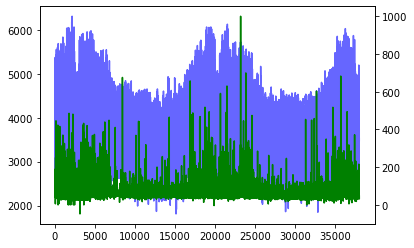

In [13]:
#df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
#df.to_csv("electricity.csv")
df=pd.read_csv("electricity.csv", na_values=['?'])
df.dropna(inplace=True)
df=df[pd.to_numeric(df["SMPEP2"], errors='coerce').notnull()]
df["SMPEP2"]=df["SMPEP2"].astype(float)
df["Year"]=pd.to_datetime(df["DateTime"]).dt.year
df["Date"]=pd.to_datetime(df["DateTime"]).dt.date
#print(df["SMPEP2"])

#label_encoder = preprocessing.LabelEncoder()
#df['Holiday']= label_encoder.fit_transform(df['Holiday'])
df.drop(columns=["Holiday"],inplace=True)
print(df.columns)


x=np.linspace(1,len(df),len(df))
plt.plot(df["SystemLoadEP2"],color="blue",alpha=.6)
twin_ax=plt.twinx()
twin_ax.plot(df["SMPEP2"],color="green")
plt.show()
#df.info()


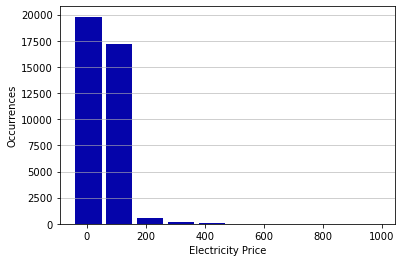

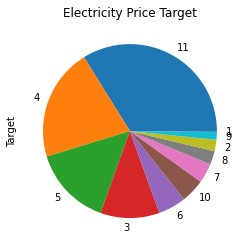

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '2013-08'),
  Text(0.0, 0, '2011-01'),
  Text(5.0, 0, '2011-06'),
  Text(10.0, 0, '2011-11'),
  Text(15.0, 0, '2012-04'),
  Text(20.0, 0, '2012-09'),
  Text(25.0, 0, '2013-02'),
  Text(30.0, 0, '2013-07'),
  Text(35.0, 0, '2013-12'),
  Text(40.0, 0, '')])

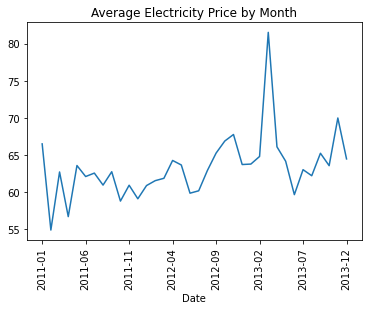

In [65]:
plt.hist(x=df["SMPEP2"],bins=10,color='#0504aa',rwidth=0.85)
plt.grid(axis='y', alpha=0.75)

plt.ylabel('Occurrences')
plt.xlabel('Electricity Price')
plt.show()

def map_target(price):
    category=0
    if price>=0 and price<10:
        category=1
    elif  price>=20 and price<30:    
        category=2
    elif  price>=30 and price<40:
        category=3
    elif  price>=50 and price<60:        
        category=4
    elif  price>=60 and price<70:                
        category=5
    elif  price>=80 and price<90:     
        category=6
    elif  price>=90 and price<100:             
        category=7
    elif  price>=100 and price<110:
        category=8
    elif  price>=110 and price<120:        
        category=9
    elif price>=120 and price<280:
        category=10
    else:
        category=11
    return category

df["Target"]=df["SMPEP2"].map(map_target)
#print(df["target"])

plt.title("Electricity Price Target")
df["Target"].value_counts().plot(kind="pie")
plt.show()

plt.title("Average Electricity Price by Month")
df.groupby(pd.to_datetime(df["Date"]).dt.strftime("%Y-%m"))["SMPEP2"].mean().plot()
plt.xticks(rotation=90)

Index(['Unnamed: 0', 'Date', 'DollarsPerMBTU'], dtype='object')


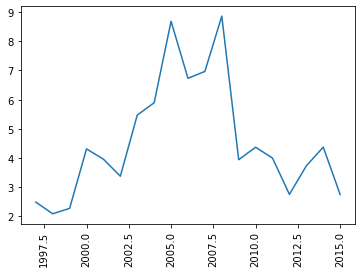

In [66]:
#df2=pd.read_csv("https://raw.githubusercontent.com/dannychua/Electricity-Price-Predictor/master/data/raw/EIA%20-%20Natural%20gas%20henry%20hub%20daily%20prices/Natural%20gas%20henry%20hub%20daily%20prices.csv",names=["Date","DollarsPerMBTU"])
#df2.dropna(inplace=True)
#df2=df2[pd.to_numeric(df2["DollarsPerMBTU"], errors='coerce').notnull()]
#df2["DollarsPerMBTU"]=df2["DollarsPerMBTU"].astype(float)
#
#df2.to_csv("natural_gas_prices.csv")
df2=pd.read_csv("natural_gas_prices.csv",parse_dates=["Date"])
print(df2.columns)
df2["Year"]=df2["Date"].dt.year
df2["Date"]=df2["Date"].dt.date
df2.set_index("Date")

#print(df2["Year"])

x = df2['Year'].unique()
y = df2.groupby('Year').mean()["DollarsPerMBTU"]

plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()
#plt.bar(x=df2.index,height=df2["DollarsPerMBTU"])
#print(df2)


In [67]:
print(df.head(10))
print(df2.head(10))
df3=pd.merge(df,df2,on="Date",how="left")
print(df3)

   Unnamed: 0          DateTime  HolidayFlag  DayOfWeek  WeekOfYear  Day  \
0           0  01/11/2011 00:00            0          1          44    1   
1           1  01/11/2011 00:30            0          1          44    1   
2           2  01/11/2011 01:00            0          1          44    1   
3           3  01/11/2011 01:30            0          1          44    1   
4           4  01/11/2011 02:00            0          1          44    1   
5           5  01/11/2011 02:30            0          1          44    1   
6           6  01/11/2011 03:00            0          1          44    1   
7           7  01/11/2011 03:30            0          1          44    1   
8           8  01/11/2011 04:00            0          1          44    1   
9           9  01/11/2011 04:30            0          1          44    1   

   Month  Year  PeriodOfDay  ForecastWindProduction  SystemLoadEA  SMPEA  \
0     11  2011            0                  315.31       3388.77  49.26   
1     11  2

In [68]:
df3.dropna(inplace=True)
X_Columns=[column for column in df3.columns if not column in["Target","DateTime","Date"]]
#print(X_Columns)
X=df3[X_Columns]
#print(X)
y=df3["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred_result  =  classifier.predict(X_test)

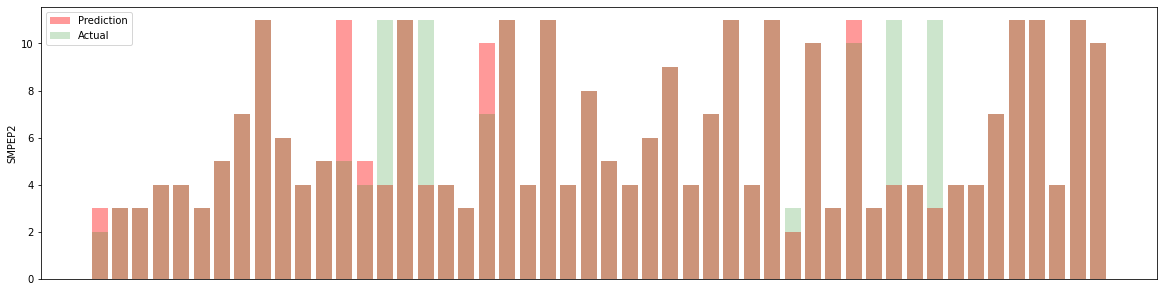

Matches occur when the red doc and blue dot overlap per interval of x.


In [69]:
y_actual_result=[]
#print(y_train)
for item in y_test[0:50]:
    y_actual_result.append(item)
    

plt.figure(figsize=(20,5))

x=np.linspace(0,len(y_pred_result[0:50]),len(y_pred_result[0:50]))
#print(len(x),len(y_pred_result))
#print(len(x),len(y_actual_result))
#plt.scatter(x=x,y=y_pred_result, color='red', label='Prediction',s=400, alpha=0.2)
plt.bar(x=x,height=y_pred_result[0:50], color='red', label='Prediction', alpha=0.4)
#plt.scatter(x=x,y=y_actual_result, color='green', label='Actual',s=200, alpha=0.2)
plt.bar(x=x,height=y_actual_result, color='green', label='Actual',alpha=0.2)

plt.ylabel("SMPEP2")
plt.xticks([])
plt.legend(loc='upper left')
plt.show()

print("Matches occur when the red doc and blue dot overlap per interval of x.")

0.7573430600883087


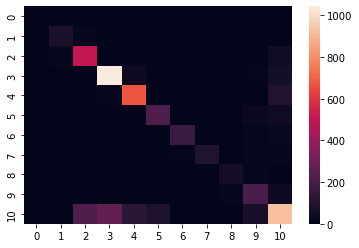

In [70]:
cm = confusion_matrix(y_test, y_pred_result)
ac = accuracy_score(y_test,y_pred_result)
sns.heatmap(cm)
print(ac)

0.9829141869840661


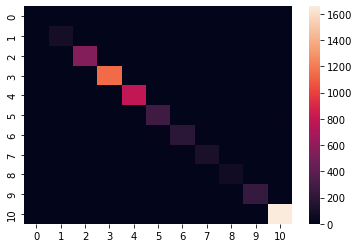

In [71]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred_result  =  classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_result)
ac = accuracy_score(y_test,y_pred_result)
sns.heatmap(cm)
print(ac)